In [1]:
import numpy as np
import pandas as pd
import random

import matplotlib
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')
%config InlineBackend.figure_format = 'svg'
%matplotlib inline

from matplotlib import rcParams
matplotlib.rcParams.update({'font.size': 10})
pd.options.display.max_columns = 30

**Описание датасета**

* **age** - возраст
* **sex** - пол
* **cp** - тип боли в груди (4 значения)
* **trestbps** - кровяное давление в покое
* **chol** - уровень холестерина (mg/dl)
* **fbs** - уровень сахара в крови натощак (1: > 120 mg/dl)
* **restecg** - результат ЭКГ в покое (значения: 0, 1, 2)
* **thalach** - достигнутая максимальная частота сердечных сокращений
* **exang** - стенокардия, вызванная физической нагрузкой
* **oldpeak** - депрессия ST(?), вызванная физической нагрузкой по отношению к отдыху
* **slope** - наклон пика упражнений сегмента ST
* **ca** - количество крупных сосудов (0-3), окрашенных по цвету
* **thal** - 0 - нормальный; 1 - исправленный дефект; 2 - обратимый дефект
* **target** - риск инфаркта: 0 - низкий, 1 - высокий

В этой задаче мы определяем риск инфаркта. Результатом могут быть два значения: 0 - низкий риск, 1 - высокий риск. Таким образом задача сводится к классификации

In [2]:
df = pd.read_csv('heart.csv')
df.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1


In [3]:
# проверяем тип данных. Убеждаемся, что все числовые
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [4]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


На мой взгляд это достаточно качественный датасет. Здесь нет выбросов и пропусков

### Приведение категориальных признаков cp, restecg, slope, ca, thal в бинарные

In [5]:
print(df['cp'].value_counts())
print(df['restecg'].value_counts())
print(df['slope'].value_counts())
print(df['ca'].value_counts())
print(df['thal'].value_counts())

0    143
2     87
1     50
3     23
Name: cp, dtype: int64
1    152
0    147
2      4
Name: restecg, dtype: int64
2    142
1    140
0     21
Name: slope, dtype: int64
0    175
1     65
2     38
3     20
4      5
Name: ca, dtype: int64
2    166
3    117
1     18
0      2
Name: thal, dtype: int64


Несмотря на то, что столбцы 'cp', 'restecg', 'slope', 'ca', 'thal' является числовыми, их хорошо бы рассматривать как категориальные, поскольку исходя из их описания и характера значений в них - это именно категории, а не непрерывные значения. Для этого зададим для этих столбцов тип "category", чтобы функция pd.get_dummies "поняла", что их нужно обработать.

In [6]:
for column in ['cp', 'restecg', 'slope', 'ca', 'thal']:
    df[column] = df[column].astype("category")
df.dtypes

age            int64
sex            int64
cp          category
trestbps       int64
chol           int64
fbs            int64
restecg     category
thalach        int64
exang          int64
oldpeak      float64
slope       category
ca          category
thal        category
target         int64
dtype: object

In [7]:
df = pd.get_dummies(df, drop_first=True, dtype='int64')
df.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,target,cp_1,cp_2,cp_3,restecg_1,restecg_2,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,63,1,145,233,1,150,0,2.3,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0
1,37,1,130,250,0,187,0,3.5,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0
2,41,0,130,204,0,172,0,1.4,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0
3,56,1,120,236,0,178,0,0.8,1,1,0,0,1,0,0,1,0,0,0,0,0,1,0
4,57,0,120,354,0,163,1,0.6,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0


In [8]:
df.shape

(303, 23)

### Логистическая регрессия

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
train, test = train_test_split(df, test_size = 0.20, random_state=29)

In [11]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(solver="liblinear")

lr.fit(train.drop('target', axis = 1), train['target'])

pred = lr.predict(test.drop('target', axis = 1))

Для подсчёта правильных ответов будем использовать метрику _accuracy_ (точность). Она равна отношению числа объектов, на которых целевой класс был угадан верно, к общему числу объектов.

In [12]:
from sklearn.metrics import accuracy_score

In [13]:
lr_acc = accuracy_score(test['target'], pred)
lr_acc

0.9016393442622951

In [14]:
pred_train = lr.predict(train.drop('target', axis = 1))
accuracy_score(train['target'], pred_train)

0.8636363636363636

Как мы видим, точность на тренировочной выборке меньше, чем на тестовой, значит модель не переобучена.

### Логистическая регрессия + стандартизация

In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [16]:
train_scaled = scaler.fit_transform(train.drop('target', axis = 1))
train_scaled = pd.DataFrame(train_scaled, columns=df.columns.drop('target'))

test_scaled = scaler.fit_transform(test.drop('target', axis = 1))
test_scaled = pd.DataFrame(test_scaled, columns=df.columns.drop('target'))

In [17]:
lr.fit(train_scaled, train['target'])

pred = lr.predict(test_scaled)

sc_lr_acc = accuracy_score(test['target'], pred)

In [18]:
sc_lr_acc

0.9016393442622951

Получаем такую же точность, как и без стандартизации

### Support Vector Machine

In [19]:
train, test = train_test_split(df, test_size = 0.20, random_state=29)

Алгоритмы метода опорных векторов расположены в модуле `svm` библиотеки `sklearn`. Импортируем из этого модуля модель `SVC` (Support Vector Classifier):

In [20]:
from sklearn.svm import SVC

In [21]:
from sklearn.preprocessing import MinMaxScaler

In [22]:
scaler = MinMaxScaler()

train_scaled = pd.DataFrame(scaler.fit_transform(train.drop('target', axis = 1)), columns=df.columns.drop('target'))

test_scaled = pd.DataFrame(scaler.transform(test.drop('target', axis = 1)), columns=df.columns.drop('target'))

Заметим, что для нормализации данных `test_scaled` мы использовали не метод `.fit_transform`, а метод `.transform`. Это мотивировано тем, что мы хотели бы, чтобы значения признаков из массивов `train_scaled` и `test_scaled` были согласованы, т.е. чтобы те значения, которые совпадали до нормализации, остались равными и после неё. Поэтому обучать модель заново на значениях из `test_scaled` мы не будем.

Итак, создадим модель и обучим её на наших тренировочных данных, а затем проверим её качество на тестовой выборке:

In [23]:
clf = SVC(gamma="auto")

clf.fit(train_scaled, train['target'])

pred = clf.predict(test_scaled)

In [24]:
svm_acc = accuracy_score(test['target'], pred)
svm_acc

0.9180327868852459

Точность чуть выше, чем при обучении модели методом Логистической регресии

In [25]:
pred_train = clf.predict(train_scaled)
accuracy_score(train['target'], pred_train)

0.8264462809917356

Как мы видим, точность на тренировочной выборке меньше, чем на тестовой, значит модель не переобучена.

### Тюнинг модели SVC

У модели SVC есть параметр `C`, который штрафует за ошибку классификации. По умолчанию этот параметр равен 1. Зададим несколько возможных значений для этого параметра и посмотрим, какие значения являются наиболее выгодными:

In [26]:
c_values = np.logspace(-2, 1, 20)

accuracy_on_test = []
accuracy_on_train = []

for i, value in enumerate(c_values):
    clf = SVC(C=value, gamma="auto")
    
    clf.fit(train_scaled, train['target'])
    
    pred = clf.predict(test_scaled)
    pred_train = clf.predict(train_scaled)
        
    acc_test = accuracy_score(test['target'], pred)
    acc_train = accuracy_score(train['target'], pred_train)
    
    if 7<i<13:
        print('C = {}'.format(value))
        print('\tacc_test = {}'.format(acc_test))
        print('\tacc_train = {}\n'.format(acc_train))
    
    accuracy_on_test.append(acc_test)
    accuracy_on_train.append(acc_train)

C = 0.18329807108324356
	acc_test = 0.9016393442622951
	acc_train = 0.8099173553719008

C = 0.26366508987303583
	acc_test = 0.9180327868852459
	acc_train = 0.8099173553719008

C = 0.37926901907322497
	acc_test = 0.9344262295081968
	acc_train = 0.8016528925619835

C = 0.5455594781168517
	acc_test = 0.9180327868852459
	acc_train = 0.8223140495867769

C = 0.7847599703514611
	acc_test = 0.9180327868852459
	acc_train = 0.8264462809917356



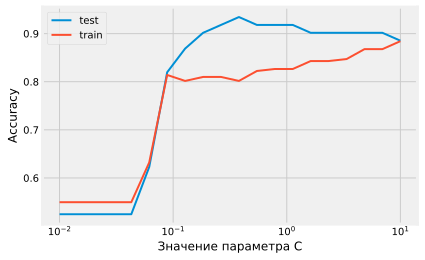

In [27]:
plt.plot(c_values, accuracy_on_test, label="test", linewidth = 2)
plt.plot(c_values, accuracy_on_train, label="train", linewidth = 2)

plt.xlabel('Значение параметра C')
plt.ylabel('Accuracy')
plt.xscale(value="log")

plt.legend()
# plt.grid()

plt.show()

Как мы видим, точность на тестовых данных до определённого момента растёт, но затем начинает падать. Пик точности попадает приблизительно на значение $C = 0.379$. Дальше мы видим спад точности на тестовых данных, однако, точность на тренировочных данных продолжает расти. Это означает, что модель начинает переобучаться.

Можно заметить, что точность на тестовых данных при $C = 0.379$ составляет $0.934$ что выше, чем при использовании SVM без настройки параметров.

In [28]:
clf = SVC(C=0.37926901907322497, gamma="auto")

clf.fit(train_scaled, train['target'])

pred = clf.predict(test_scaled)

svc_acc = accuracy_score(test['target'], pred)
svc_acc

0.9344262295081968

### KNN + RobustScaler
Метод KNN основан на предположении, что объекты одного класса расположены в пространстве близко друг к другу. Таким образом, можно классифицировать новый объект исходя из того, какие объекты находятся в пространстве рядом с ним.

В первую очередь, раз мы работаем с расстояниями между объектами, нам необходимо отмасштабировать признаки так, чтобы они вносили в это расстояние соизмеримый вклад. Делать это мы будем с помощью RobustScaler. При таком подходе масштабирования признаков минимизируется влияние выбросов в данных. Это достигается за счёт того, что при масштабировании используется медиана и интерквартильный размах.

In [29]:
train, test = train_test_split(df.copy(), test_size = 0.20, random_state=29)

In [30]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import RobustScaler

In [31]:
df.describe()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,target,cp_1,cp_2,cp_3,restecg_1,restecg_2,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,131.623762,246.264026,0.148515,149.646865,0.326733,1.039604,0.544554,0.165017,0.287129,0.075908,0.501650,0.013201,0.462046,0.468647,0.214521,0.125413,0.066007,0.016502,0.059406,0.547855,0.386139
std,9.082101,0.466011,17.538143,51.830751,0.356198,22.905161,0.469794,1.161075,0.498835,0.371809,0.453171,0.265288,0.500824,0.114325,0.499382,0.499842,0.411169,0.331734,0.248704,0.127605,0.236774,0.498528,0.487668
min,29.000000,0.000000,94.000000,126.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,120.000000,211.000000,0.000000,133.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,55.000000,1.000000,130.000000,240.000000,0.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,61.000000,1.000000,140.000000,274.500000,0.000000,166.000000,1.000000,1.600000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,77.000000,1.000000,200.000000,564.000000,1.000000,202.000000,1.000000,6.200000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Применим `RobustScaler` к колонкам `age`, `trestbps`, `chol`, `thalach` и `oldpeak`.

In [32]:
scaler = RobustScaler()
cols_for_scaling = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

train[cols_for_scaling] = scaler.fit_transform(train[cols_for_scaling])
test[cols_for_scaling] = scaler.transform(test[cols_for_scaling])

In [33]:
train[cols_for_scaling].describe()

,age,trestbps,chol,thalach,oldpeak
count,242.000000,242.000000,242.000000,242.000000,2.420000e+02
mean,-0.129132,0.147521,0.136714,-0.102290,2.525826e-01
std,0.746976,0.879359,0.861562,0.764776,7.470777e-01
min,-2.250000,-1.800000,-1.872881,-2.672131,-4.062500e-01
25%,-0.666667,-0.500000,-0.415254,-0.590164,-4.062500e-01
50%,0.000000,0.000000,0.000000,0.000000,3.469447e-17
75%,0.333333,0.500000,0.584746,0.409836,5.937500e-01
max,1.750000,3.500000,5.550847,1.622951,3.468750e+00


Как мы видим после масштабирования, медиана каждого из масштабируемых признаков стала равной 0.

Построим модель для различных `K` чтобы подобрать наиболее удачное значение.

In [34]:
k_values = np.arange(1, 21)

accuracy_on_test = []
accuracy_on_train = []

for i, value in enumerate(k_values):
    clf = KNeighborsClassifier(n_neighbors=value)
    
    clf.fit(train.drop('target', axis = 1), train['target'])
    
    pred = clf.predict(test.drop('target', axis = 1))
    pred_train = clf.predict(train.drop('target', axis = 1))
        
    acc_test = accuracy_score(test['target'], pred)
    acc_train = accuracy_score(train['target'], pred_train)
    
    if i in np.arange(10, 15):
        print('K = {}'.format(value))
        print('\tacc_test = {}'.format(acc_test))
        print('\tacc_train = {}\n'.format(acc_train))
    
    accuracy_on_test.append(acc_test)
    accuracy_on_train.append(acc_train)

K = 11
	acc_test = 0.8688524590163934
	acc_train = 0.8429752066115702

K = 12
	acc_test = 0.8852459016393442
	acc_train = 0.8305785123966942

K = 13
	acc_test = 0.8852459016393442
	acc_train = 0.8388429752066116

K = 14
	acc_test = 0.8524590163934426
	acc_train = 0.8264462809917356

K = 15
	acc_test = 0.8688524590163934
	acc_train = 0.8388429752066116



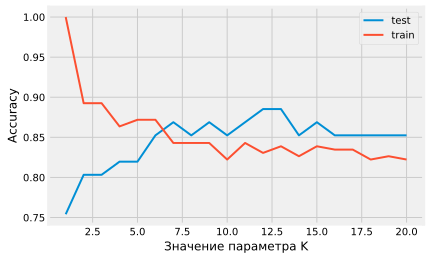

In [35]:
plt.plot(k_values, accuracy_on_test, label="test", linewidth = 2)
plt.plot(k_values, accuracy_on_train, label="train", linewidth = 2)

plt.xlabel('Значение параметра K')
plt.ylabel('Accuracy')

plt.legend()
# plt.grid()


plt.show()

Мы видим, что при малых значениях `K` модель склонна к переобучению. Оптимальным выбором является число $K = 12$ с максимальной точностью $0.885$. Построим модель ещё раз, используя эти знания.

In [36]:
clf = KNeighborsClassifier(n_neighbors=12)

clf.fit(train.drop('target', axis = 1), train['target'])

pred = clf.predict(test.drop('target', axis = 1))

knn_acc = accuracy_score(test['target'], pred)
knn_acc

0.8852459016393442

### Метрики качества классификационных моделей

Метрика _precision_ (точность) является долей объектов класса 1, верно классифицированных моделью, к общему числу объектов, которые модель классифицировала как объекты класса 1.

In [37]:
from sklearn.metrics import precision_score

precision_score(test['target'], pred)

0.8378378378378378

Метрика recall (полнота) является долей найденных моделью объектов класса 1:

In [38]:
from sklearn.metrics import recall_score

recall_score(test['target'], pred)

0.96875

#### F-мера

Хорошим способом комбинировать две предыдущие метрики является мера $F_1$:

In [39]:
from sklearn.metrics import f1_score

f1_score(test['target'], pred)

0.8985507246376812

#### AUC

In [40]:
from sklearn.metrics import roc_auc_score

roc_auc_score(test['target'], pred)

0.880926724137931

In [41]:
pred_proba = clf.predict_proba(test.drop('target', axis = 1))

print(pred_proba[:10])

[[0.91666667 0.08333333]
 [0.         1.        ]
 [0.91666667 0.08333333]
 [0.5        0.5       ]
 [0.16666667 0.83333333]
 [0.91666667 0.08333333]
 [0.58333333 0.41666667]
 [0.         1.        ]
 [0.75       0.25      ]
 [0.25       0.75      ]]


In [42]:
pred_proba = pred_proba[:, 1]

In [43]:
print(pred_proba[:5])

[0.08333333 1.         0.08333333 0.5        0.83333333]


In [44]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(test['target'], pred_proba, pos_label=1)

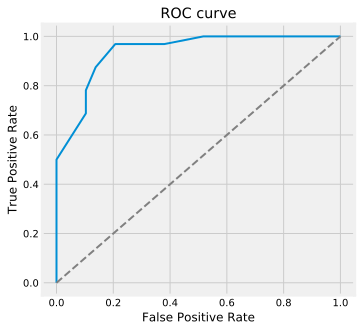

In [45]:
plt.rcParams['figure.figsize'] = 5, 5

plt.plot(fpr, tpr, linewidth = 2)
plt.plot([0, 1], [0, 1], color='grey', linestyle='dashed', linewidth = 2)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')

plt.show()

In [46]:
roc_auc_score(test['target'], pred_proba)

0.9391163793103448

### Дерево решений

Определим оптимальное значение max_depth

In [47]:
from sklearn.tree import DecisionTreeClassifier

In [48]:
train, test = train_test_split(df, test_size = 0.20, random_state=29)

In [49]:
max_depth_values = np.arange(2, 10)

accuracy_on_test = []
accuracy_on_train = []

for i, value in enumerate(max_depth_values):
    clf = DecisionTreeClassifier(max_depth=value)
    
    clf.fit(train.drop('target', axis = 1), train['target'])
    
    pred = clf.predict(test.drop('target', axis = 1))
    pred_train = clf.predict(train.drop('target', axis = 1))
        
    acc_test = accuracy_score(test['target'], pred)
    acc_train = accuracy_score(train['target'], pred_train)
    
    if i in np.arange(0, 4):
        print('K = {}'.format(value))
        print('\tacc_test = {}'.format(acc_test))
        print('\tacc_train = {}\n'.format(acc_train))
    
    accuracy_on_test.append(acc_test)
    accuracy_on_train.append(acc_train)

K = 2
	acc_test = 0.7868852459016393
	acc_train = 0.7892561983471075

K = 3
	acc_test = 0.8360655737704918
	acc_train = 0.8347107438016529

K = 4
	acc_test = 0.8360655737704918
	acc_train = 0.8801652892561983

K = 5
	acc_test = 0.7540983606557377
	acc_train = 0.9090909090909091



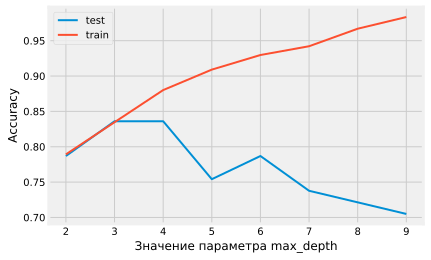

In [50]:
plt.rcParams['figure.figsize'] = 6, 4

plt.plot(max_depth_values, accuracy_on_test, label="test", linewidth = 2)
plt.plot(max_depth_values, accuracy_on_train, label="train", linewidth = 2)

plt.xlabel('Значение параметра max_depth')
plt.ylabel('Accuracy')

plt.legend()
# plt.grid()

plt.show()

При достаточно больших значениях параметра `max_depth` точность на тренировочных данных почти достигает 1. На валидационных же данных точность достигает своего пика приблизительно на значении `max_depth = 4`, а затем начинает падать.

In [51]:
clf = DecisionTreeClassifier(max_depth=4)

clf.fit(train.drop('target', axis = 1), train['target'])

pred = clf.predict(test.drop('target', axis = 1))

tree_acc = accuracy_score(test['target'], pred)
tree_acc

0.8360655737704918

### Случайный лес и Кросс-валидация

In [52]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [53]:
parameters = {
    'n_estimators': [100, 150, 200],
    'max_features': np.arange(3, 10),
    'max_depth': np.arange(8, 15)
}

clf = GridSearchCV(
    estimator=RandomForestClassifier(random_state=29),
    param_grid=parameters,
    scoring='accuracy',
    cv=5,
)

In [54]:
train, test = train_test_split(df, test_size = 0.20, random_state=29)

In [55]:
clf.fit(train.drop('target', axis = 1), train['target'])

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=29,
                                  

Наилучшие параметры можно также посмотреть, используя атрибут `.best_params_`.

In [56]:
clf.best_params_

{'max_depth': 11, 'max_features': 6, 'n_estimators': 150}

Полученная в результате модель аналогична такой модели:

In [57]:
clf = RandomForestClassifier(max_depth=11, max_features=6, n_estimators=150, random_state=29)

clf.fit(train.drop('target', axis = 1), train['target'])

pred = clf.predict(test.drop('target', axis = 1))

forest_acc = accuracy_score(test['target'], pred)
forest_acc

0.8524590163934426

Из полученного результата видно, что точность модели при обучении методами случайного леса чуть выше, чем при обучении деревом решений.

Для данного датасета наиболее точной моделью обучения из рассмотренных является `Support Vector Classifier` модуля `Support Vector Machine` с заданным параметром `C`, при котором достигается максимальная точность